<a href="https://colab.research.google.com/github/cevikhalil/Data-Science-with-Python-and-Tensorflow/blob/main/20_Tensorflow_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron



* In the context of neural networks, a perceptron is an artificial neuron using the Heaviside step function as the activation function. The perceptron algorithm is also termed the single-layer perceptron, to distinguish it from a multilayer perceptron, which is a misnomer for a more complicated neural network. As a linear classifier, the single-layer perceptron is the simplest feedforward neural network.


## Activation Functions


1. ReLU (Rectified Linear Unit)
  * Takes value between 0 and infinity
  * Generally used for deep learning
---
2. Sigmoid
  * Takes value between 0 and 1 
  * Generally used for classification problems
---
3. Tanh (Hyperbolic Tangent)
  * Takes value between -1 and 1
  * Generally used for classification problems


## Regression

* **Cost Function:** a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number. 
* **Cross Entropy Loss:** measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.
* **Gradient Descent:** an optimization function which can be used to minimize cost function

## Tensorflow Introduction

In [114]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Veri_bilimi_icin_python_ve_tensorflow/bike_prices.xlsx')
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [ ]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


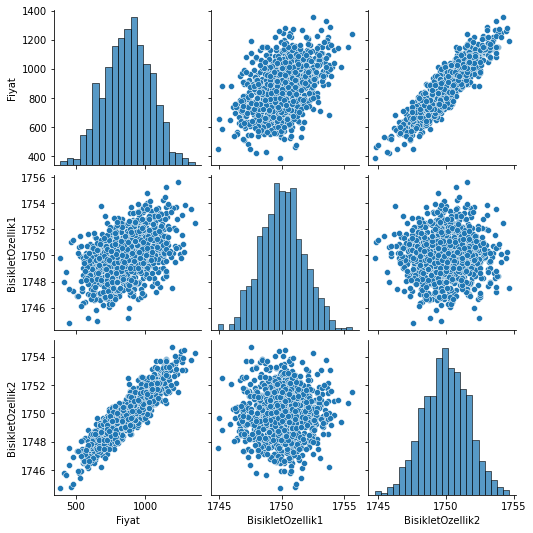

In [ ]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.pairplot(df)

**Test / Train Split**

In [ ]:
from sklearn.model_selection import train_test_split
y = df["Fiyat"].values # y -> label
x = df[["BisikletOzellik1","BisikletOzellik2"]].values # x -> feature

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [ ]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(670, 2)
(670,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(330, 2)
(330,)


**Scale**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)
print(x_test)

[[0.3177906  0.64341466]
 [0.61991638 0.89583174]
 [0.53950097 0.0980286 ]
 ...
 [0.2352117  0.52644765]
 [0.7576794  0.19157421]
 [0.4292982  0.16530301]]
[[ 0.56706914  0.70743354]
 [ 0.45694459  0.23213923]
 [ 0.54990366  0.48049092]
 [ 0.2940838   0.62874574]
 [ 0.25255028  0.65552399]
 [-0.01410839  0.26503552]
 [ 0.47207615  0.58340399]
 [ 0.44645595  0.66652423]
 [ 0.71271197  0.47558898]
 [ 0.52327593  0.65795133]
 [ 0.51589828  0.35124843]
 [ 0.68132069  0.46394647]
 [ 0.34838222  0.66396795]
 [ 0.59835704  0.66492102]
 [ 0.7743903   0.65539702]
 [ 0.36366154  0.34590211]
 [ 0.38364758  0.85598251]
 [ 0.15783877  0.41240613]
 [ 0.3581219   0.90091814]
 [ 0.54142039  0.49688287]
 [ 0.49003412  0.52974122]
 [ 0.61542611  0.26192082]
 [ 0.5697328  -0.01882354]
 [ 0.15993374  0.36593875]
 [ 0.58693437  0.41410011]
 [ 0.66459019  0.6746364 ]
 [ 0.37258234  0.37907714]
 [ 0.37582535  0.4277929 ]
 [ 0.36091834  0.57131193]
 [ 0.39482364  0.43438779]
 [ 0.23086485  0.14302699]
 [ 0.56

**Tensorflow**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse" )
# mse -> mean squared error
# rms -> root mean square 
model.fit(x_train,y_train,epochs = 250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 797754.1875
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 797139.4375
Epoch 3/250
21/21 [==============================] - 0s 956us/step - loss: 796692.5625
Epoch 4/250
21/21 [==============================] - 0s 930us/step - loss: 796320.3750
Epoch 5/250
21/21 [==============================] - 0s 959us/step - loss: 796028.7500
Epoch 6/250
21/21 [==============================] - 0s 970us/step - loss: 795828.5000
Epoch 7/250
21/21 [==============================] - 0s 992us/step - loss: 795703.1250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 795626.5000
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 795567.3125
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 795506.3750
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 795431.7500
Epoch 12/250
21/21 [==============================] -

In [ ]:
loss = model.history.history["loss"]

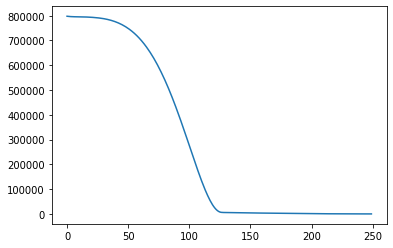

In [ ]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [ ]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)
trainLoss

96.17283630371094

In [ ]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

94.12112426757812

In [ ]:
testPrediction = model.predict(x_test)
testPrediction

array([[1072.3696 ],
       [ 630.6836 ],
       [ 875.9457 ],
       [ 895.15173],
       [ 900.53033],
       [ 465.6638 ],
       [ 930.0378 ],
       [ 988.94257],
       [ 938.379  ],
       [1013.17676],
       [ 754.183  ],
       [ 915.83527],
       [ 946.7355 ],
       [1049.6725 ],
       [1113.652  ],
       [ 687.51575],
       [1121.4037 ],
       [ 658.9205 ],
       [1148.4777 ],
       [ 886.16034],
       [ 892.5877 ],
       [ 720.29645],
       [ 467.31204],
       [ 620.994  ],
       [ 835.66583],
       [1084.8444 ],
       [ 718.8493 ],
       [ 760.8334 ],
       [ 874.5256 ],
       [ 774.10046],
       [ 463.93127],
       [ 785.18665],
       [ 732.7442 ],
       [ 654.043  ],
       [ 886.9595 ],
       [ 845.12164],
       [1031.2281 ],
       [1019.9088 ],
       [ 845.5811 ],
       [ 863.2925 ],
       [ 760.4427 ],
       [1167.3165 ],
       [1091.6763 ],
       [1081.9426 ],
       [ 872.062  ],
       [ 604.45233],
       [1140.0828 ],
       [ 971.

In [ ]:
predictionDf = pd.DataFrame(y_test,columns = ["Real Y"])
predictionDf

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
import pandas as pd
testPrediction = pd.Series(testPrediction.reshape(330,))
testPrediction

0      1072.369629
1       630.683594
2       875.945679
3       895.151733
4       900.530334
          ...     
325    1009.603943
326     794.255554
327     768.640564
328    1159.272583
329     806.352478
Length: 330, dtype: float32

In [ ]:
predictionDf = pd.concat([predictionDf,testPrediction],axis=1)
predictionDf

,Real Y,0
0,1081.652164,1072.369629
1,622.675990,630.683594
2,889.356810,875.945679
3,902.826733,895.151733
4,897.662404,900.530334
...,...,...
325,1028.438035,1009.603943
326,789.934950,794.255554
327,758.490486,768.640564
328,1172.871659,1159.272583


In [ ]:
predictionDf.columns = ["Real Y", "Predicted Y"]
predictionDf

,Real Y,Predicted Y
0,1081.652164,1072.369629
1,622.675990,630.683594
2,889.356810,875.945679
3,902.826733,895.151733
4,897.662404,900.530334
...,...,...
325,1028.438035,1009.603943
326,789.934950,794.255554
327,758.490486,768.640564
328,1172.871659,1159.272583


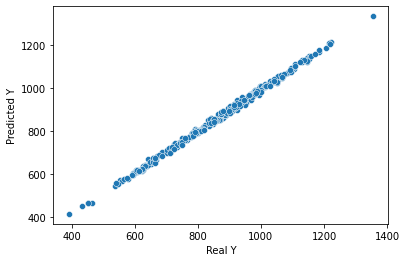

In [ ]:
sbn.scatterplot(x = "Real Y", y = "Predicted Y", data = predictionDf)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(predictionDf["Real Y"],predictionDf["Predicted Y"])
mse = mean_squared_error(predictionDf["Real Y"],predictionDf["Predicted Y"])
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

Mean Absolute Error:  7.800101981464249
Mean Squared Error:  94.12110804135631


In [ ]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [ ]:
from tensorflow.keras.models import load_model
model.save("bike_model.h5")
calledModel = load_model("bike_model.h5")

In [ ]:
newBikeFeatures = [[1751,1750]]
newBikeFeatures = scaler.transform(newBikeFeatures)
calledModel.predict(newBikeFeatures)

array([[913.149]], dtype=float32)

## Used Car Dataset (from Kaggle)

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [116]:
dataFrame = pd.read_excel("/content/drive/My Drive/Veri_bilimi_icin_python_ve_tensorflow/merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [117]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [118]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


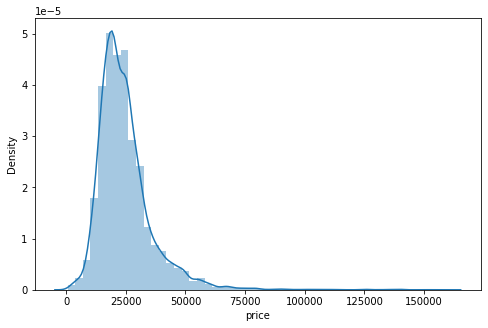

In [124]:
plt.figure(figsize=(8,5))
sbn.distplot(dataFrame["price"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


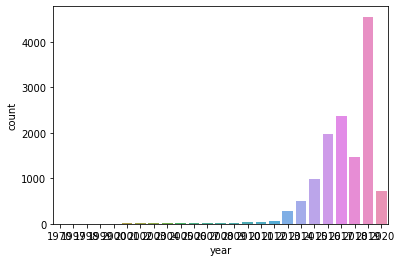

In [126]:
sbn.countplot(dataFrame["year"])

In [127]:
dataFrame.corr() # correlation

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [128]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

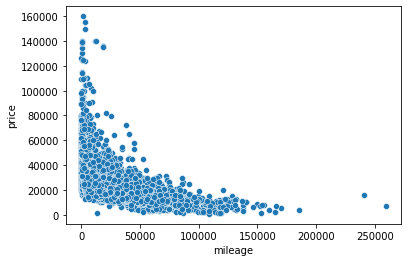

In [130]:
sbn.scatterplot(x = "mileage", y = "price", data = dataFrame)

In [134]:
dataFrame.sort_values("price", ascending = False).head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [135]:
dataFrame.sort_values("price", ascending = True).head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


**Dropping out the most expensive car prices from dataset (131 values)**

In [136]:
len(dataFrame)

13119

In [137]:
len(dataFrame) * 0.01

131.19

In [141]:
ninetyninePercentDf = dataFrame.sort_values("price", ascending = False).iloc[131:] # %99 of our data
ninetyninePercentDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


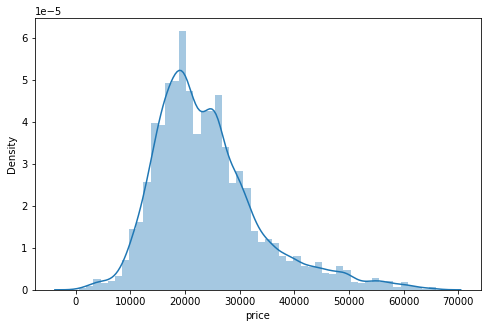

In [143]:
plt.figure(figsize=(8,5))
sbn.distplot(ninetyninePercentDf["price"])

In [146]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [147]:
ninetyninePercentDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [149]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [152]:
dataFrame = dataFrame[dataFrame.year != 1970]
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [153]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [155]:
# Dropping out 'transmission' column
dataFrame = dataFrame.drop("transmission",axis=1)
dataFrame

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


**Train/Test Split**

In [158]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis = 1).values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [159]:
len(x_train)

9182

In [160]:
len(x_test)

3936

**Scale**

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**Tensorflow Model**

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(x = x_train, y = y_train, 
          validation_data = (x_test, y_test),
          batch_size = 250,
          epochs = 300)

Epoch 1/300
37/37 [==============================] - 0s 4ms/step - loss: 741599936.0000 - val_loss: 770450432.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 741563520.0000 - val_loss: 770390784.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 741458944.0000 - val_loss: 770212096.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 741138496.0000 - val_loss: 769668288.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 740232960.0000 - val_loss: 768252288.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 738062784.0000 - val_loss: 765026176.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 733306496.0000 - val_loss: 758203456.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 723846208.0000 - val_loss: 745255168.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 7067031

In [168]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,741599936.0,770450432.0
1,741563520.0,770390784.0
2,741458944.0,770212096.0
3,741138496.0,769668288.0
4,740232960.0,768252288.0


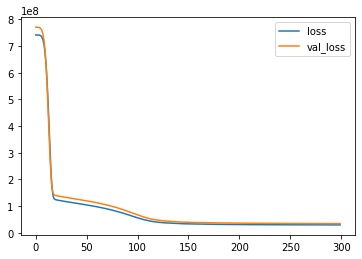

In [169]:
lossData.plot()

In [170]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictArray = model.predict(x_test)
predictArray

array([[39411.875],
       [31588.156],
       [42820.72 ],
       ...,
       [23199.537],
       [19164.906],
       [21271.867]], dtype=float32)

In [171]:
mean_absolute_error(y_test, predictArray)

3540.505594968719

In [172]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13118.000000,13118.000000,13118.00000,13118.000000,13118.000000,13118.000000
mean,2017.299893,24698.574020,21950.16504,129.958835,55.157059,2.071688
std,2.186129,11843.126668,21177.20571,65.244877,15.220025,0.572162
min,1997.000000,650.000000,1.00000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6096.75000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.00000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31781.75000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.00000,580.000000,217.300000,6.200000


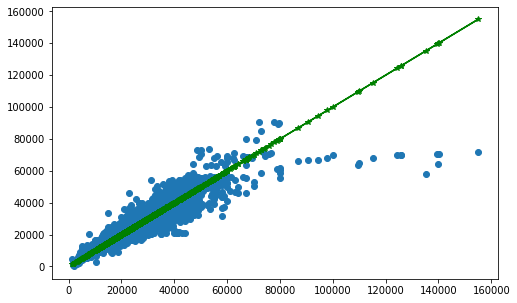

In [175]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, predictArray)
plt.plot(y_test, y_test, "g-*")